## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
df.shape

(614, 13)

In [56]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [58]:
# Missing values:
# Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History

# Look at each variable below individually

Look at some basic statistics for numerical variables.

In [62]:
num_feats = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
cat_feats = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area'] #'Loan_Amount_Term' - acts like a category but will treat as num feat in pipeline

y = ['Loan_Status']

In [63]:
# Approved and not by feature

df_cat.groupby(['Loan_Status']).aggregate('count')

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Amount_Term
Loan_Status,,,,,,,,
N,187,192,186,192,183,179,192,186
Y,414,419,413,422,399,385,422,414


In [60]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [61]:
# 'ApplicantIncome'
# Seems to be skewed by some high incomes looking and median and mean
print(f'median income: {df.ApplicantIncome.median()}')
print(f'mean income: {df.ApplicantIncome.mean()}')      
print(f'max income: {df.ApplicantIncome.max()}')   
print(f'min income: {df.ApplicantIncome.min()}')   

median income: 3812.5
mean income: 5403.459283387622
max income: 81000
min income: 150


In [14]:
# CoapplicantIncome
# This makes sense as a number of applications don't have coapplicants 
print(f'median Coapplicant income: {df.CoapplicantIncome.median()}')
print(f'mean Coapplicant income: {df.CoapplicantIncome.mean()}')      
print(f'max Coapplicant income: {df.CoapplicantIncome.max()}')   
print(f'min Coapplicant income: {df.CoapplicantIncome.min()}')  

# zero's DO make sense here
# df[df.CoapplicantIncome ==0].count()

median Coapplicant income: 1188.5
mean Coapplicant income: 1621.245798027101
max Coapplicant income: 41667.0
min Coapplicant income: 0.0


In [15]:
# LoanAmount - HAS MISSING VALUES
print(f'missing: {df.LoanAmount.isna().sum()}')
# df.LoanAmount.isna().Index.tolist()
print(f'percentage missing: {df.LoanAmount.isna().sum()/df.LoanAmount.count()}')
print(f'median loan amount: {df.LoanAmount.median()}')
print(f'mean loan amount: {df.LoanAmount.mean()}')      
print(f'max loan amount: {df.LoanAmount.max()}')   
print(f'min loan amount: {df.LoanAmount.min()}')  

missing: 22
percentage missing: 0.037162162162162164
median loan amount: 128.0
mean loan amount: 146.41216216216216
max loan amount: 700.0
min loan amount: 9.0


In [16]:
# Loan_Amount_Term, - HAS MISSING VALUES
print(f'missing: {df.Loan_Amount_Term.isna().sum()}')
df.Loan_Amount_Term.isna().sum()/df.Loan_Amount_Term.count()

missing: 14


0.023333333333333334

In [17]:
# Credit_History (categorical) - HAS MISSING VALUES (assign to 0)
df_with_hist = df[df.Credit_History ==1].count()
df_no_hist = df[df.Credit_History ==0].count()
print(f'with history: {df_with_hist["Credit_History"]}')
print(f'na history: {df.Credit_History.isna().sum()}')
print(f'no history: {df_no_hist["Credit_History"]}')

with history: 475
na history: 50
no history: 89


In [20]:
# Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History

### Categorical Features

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

#### Gender

In [23]:
df.loc[df["Gender"].isna() == True] # wipe if credit_history and gender both Nan, wipe, otherwise set to median

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


#### Married

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [24]:
# null values
df.loc[df["Married"].isna() == True]

# DROP 435

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


#### Education

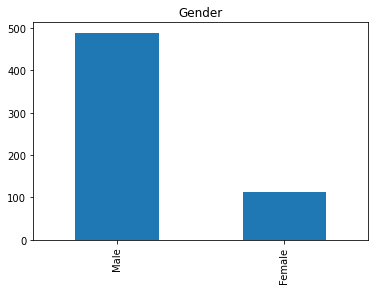

In [3]:
# Gender
df['Gender'].value_counts().plot(kind='bar', title="Gender");

#### Dependents

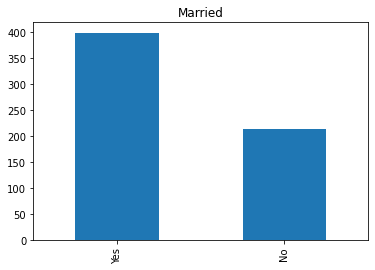

In [4]:
# Married
df['Married'].value_counts().plot(kind='bar', title = 'Married');

In [27]:
# Null values
df.loc[df["Dependents"].isna() == True] # set to median (0)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


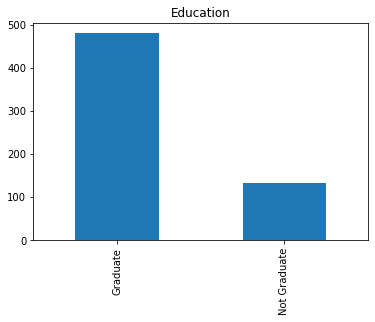

In [5]:
# 'Education' - no null values
df['Education'].value_counts().plot(kind='bar', title = 'Education');

In [29]:
# Null Values
df.loc[df["Credit_History"].isna() == True].head() #???? #DROP IF SELF_EMPLOYED AND CREDIT HISTORY NAN, otherwise fill with mode or median

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y


#### Self Employed

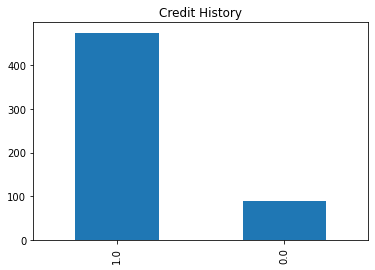

In [28]:
df['Credit_History'].value_counts().plot(kind='bar', title="Credit History");

In [65]:
# Null Values
# print(f'median {df.Self_Employed.median()}') (after converted)
df.loc[df["Self_Employed"].isna() == True].count() # Set to most frequent (1)

# IF credit_history == NaN as well, drop

Loan_ID              32
Gender               32
Married              32
Dependents           32
Education            32
Self_Employed         0
ApplicantIncome      32
CoapplicantIncome    32
LoanAmount           31
Loan_Amount_Term     31
Credit_History       26
Property_Area        32
Loan_Status          32
dtype: int64

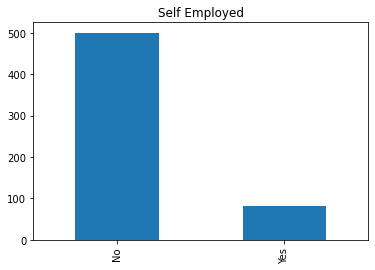

In [27]:
# 'Self_Employed'
df['Self_Employed'].value_counts().plot(kind='bar', title='Self Employed');

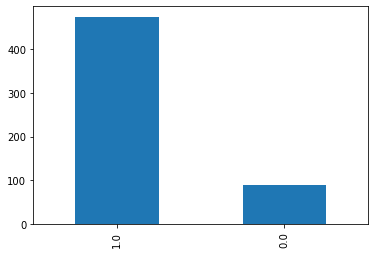

In [33]:
# 'Credit_History'
df['Credit_History'].value_counts().plot(kind='bar');

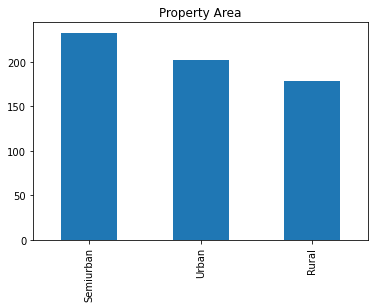

In [23]:
# 'Property_Area'
df['Property_Area'].value_counts().plot(kind='bar', title= 'Property Area');

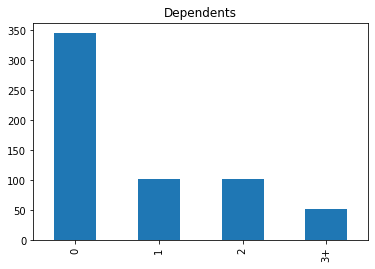

In [24]:
# 'Dependents' FOR NA - ASSIGN MODE
df['Dependents'].value_counts().plot(kind='bar', title='Dependents');

median 360.0


Loan_ID              14
Gender               14
Married              14
Dependents           13
Education            14
Self_Employed        13
ApplicantIncome      14
CoapplicantIncome    14
LoanAmount           14
Loan_Amount_Term      0
Credit_History       14
Property_Area        14
Loan_Status          14
dtype: int64

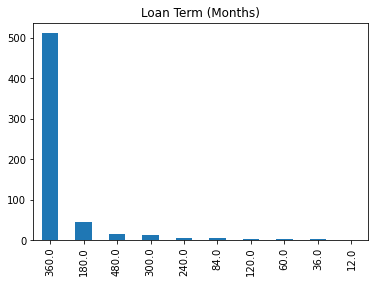

In [ ]:
# Number of null loan_amt_terms

df.Loan_Amount_Term.value_counts().plot(kind='bar', title = 'Loan Term (Months)');
print(f'median {df.Loan_Amount_Term.median()}')
df.loc[df["Loan_Amount_Term"].isna() == True].count()


## Numeric Features

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



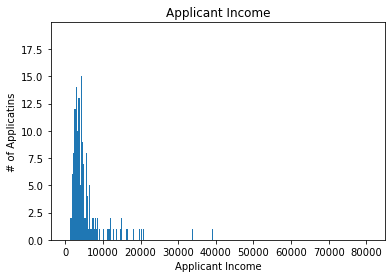

In [37]:
# ApplicantIncome
x = df.ApplicantIncome
plt.hist(x, bins=1000) 
plt.title('Applicant Income')
plt.ylabel('# of Applicatins')
plt.xlabel('Applicant Income');

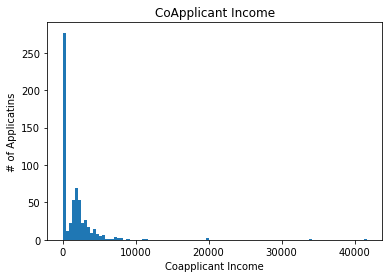

In [38]:
# 'CoapplicantIncome'
x = df.CoapplicantIncome
plt.hist(x, bins=100) 
plt.title('CoApplicant Income')
plt.ylabel('# of Applicatins')
plt.xlabel('Coapplicant Income');

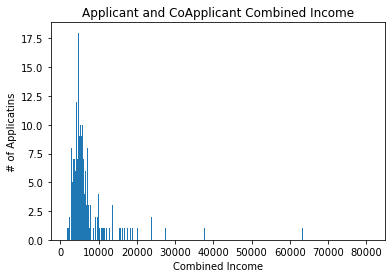

In [39]:
# 'TotalIncome' *NEW FEATURE
x =  df.ApplicantIncome + df.CoapplicantIncome
plt.hist(x, bins=1000) 
plt.title('Applicant and CoApplicant Combined Income')
plt.ylabel('# of Applicatins')
plt.xlabel('Combined Income');

# still has skew

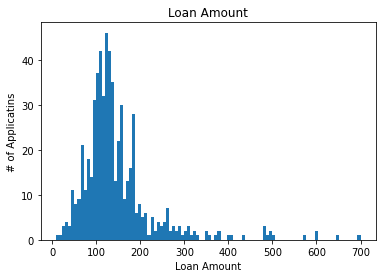

In [40]:
# 'LoanAmount'
x =  df.LoanAmount
plt.hist(x, bins=100) 
plt.title('Loan Amount')
plt.ylabel('# of Applicatins')
plt.xlabel('Loan Amount');

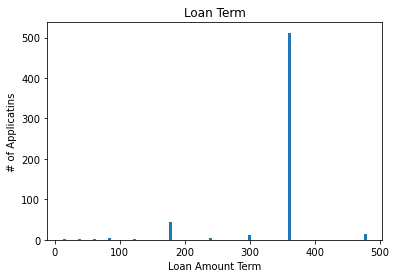

In [41]:
# 'Loan_Amount_Term'
x =  df.Loan_Amount_Term
plt.hist(x, bins=100) 
plt.title('Loan Term')
plt.ylabel('# of Applicatins')
plt.xlabel('Loan Amount Term');

# THIS IS CATEGORICAL

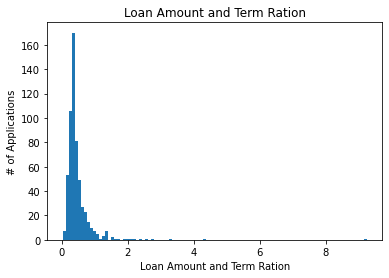

In [42]:
# Loan_Amt_Term_ratio *NEW FEATURE
x =  df.LoanAmount/df.Loan_Amount_Term
plt.hist(x, bins=100) 
plt.title('Loan Amount and Term Ration')
plt.ylabel('# of Applications')
plt.xlabel('Loan Amount and Term Ration');

# SEE IF THIS CORRELATES?


Look at box plots to understand the distributions. 

In [47]:
df = pd.read_csv("data/data.csv")

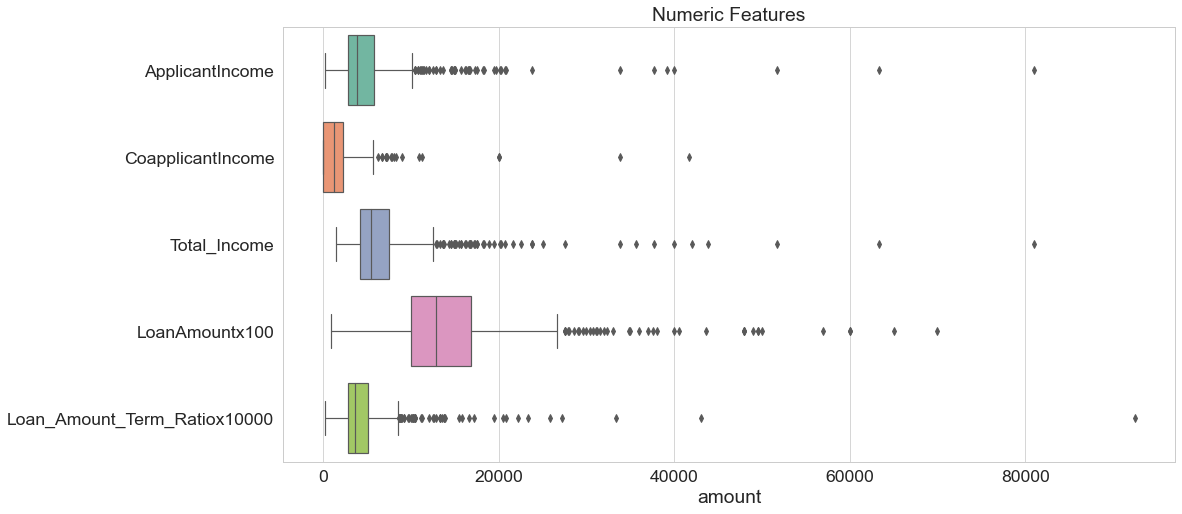

In [40]:
# Box plot numeric features to see spread - **NEED TO REMOVE OUTLIERS FOR INCOME AND LOAN AMOUNT... ALSO EVAUATE LOAN TERMS
df['LoanAmountx100'] = df['LoanAmount']*100
df['Loan_Amount_Termx100'] = df['Loan_Amount_Term']*100
df['Total_Income'] = df['ApplicantIncome'] +df['CoapplicantIncome']
df['Loan_Amount_Term_Ratiox10000'] = (df.LoanAmount*10000/df.Loan_Amount_Term)
df_plot = df[['ApplicantIncome', 'CoapplicantIncome', 'Total_Income', 'LoanAmountx100', 'Loan_Amount_Term_Ratiox10000']]

sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2)  
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_plot, orient="h", palette="Set2")

# ax = sns.boxplot(data=box_data)
# sns.set_palette(palette="crest", n_colors=1)
sns.color_palette("crest", as_cmap=True)

ax.set(title='Numeric Features', xlabel="amount");


In [48]:
def remove_outliers(df, cols):
#     cols = ['Total_Income_log']#, 'LoanAmt_Term_Ratio_Log', 'LoanAmountLog'] 
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
#     df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    df = df[~((df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df

df = remove_outliers(df, ['ApplicantIncome', 'LoanAmount'])

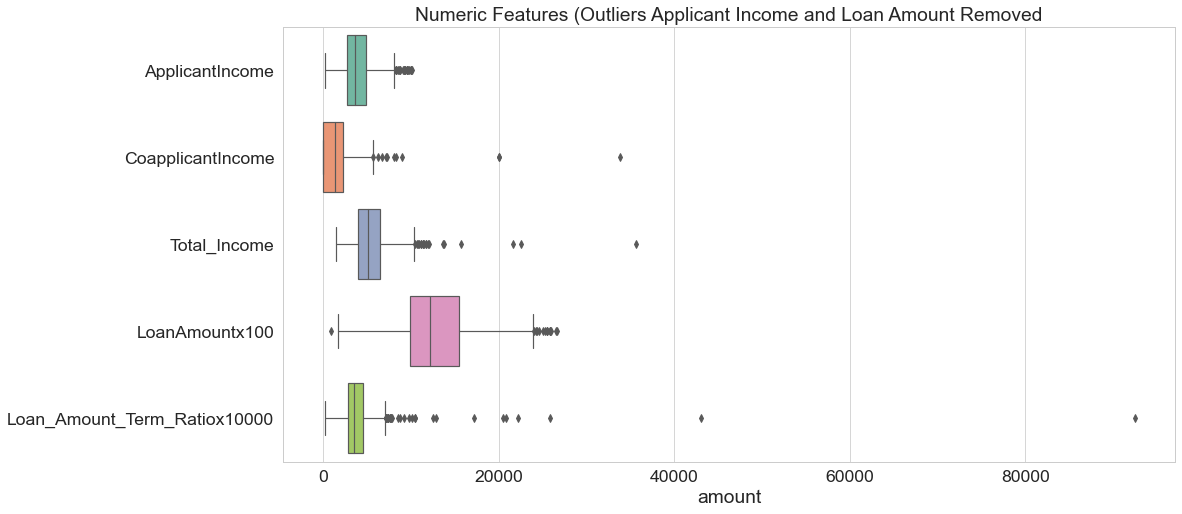

In [50]:
#  Plot with outliers removed 

# Box plot numeric features to see spread 
df['LoanAmountx100'] = df['LoanAmount']*100
df['Loan_Amount_Termx100'] = df['Loan_Amount_Term']*100
df['Total_Income'] = df['ApplicantIncome'] +df['CoapplicantIncome']
df['Loan_Amount_Term_Ratiox10000'] = (df.LoanAmount*10000/df.Loan_Amount_Term)
df_plot = df[['ApplicantIncome', 'CoapplicantIncome', 'Total_Income', 'LoanAmountx100', 'Loan_Amount_Term_Ratiox10000']]
# df_plot = df[[ 'Total_Income', 'LoanAmountx100', 'Loan_Amount_Term_Ratiox10000']]

sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2)  
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_plot, orient="h", palette="Set2")

# ax = sns.boxplot(data=box_data)
# sns.set_palette(palette="crest", n_colors=1)
sns.color_palette("crest", as_cmap=True)

ax.set(title='Numeric Features (Outliers Applicant Income and Loan Amount Removed', xlabel="amount");

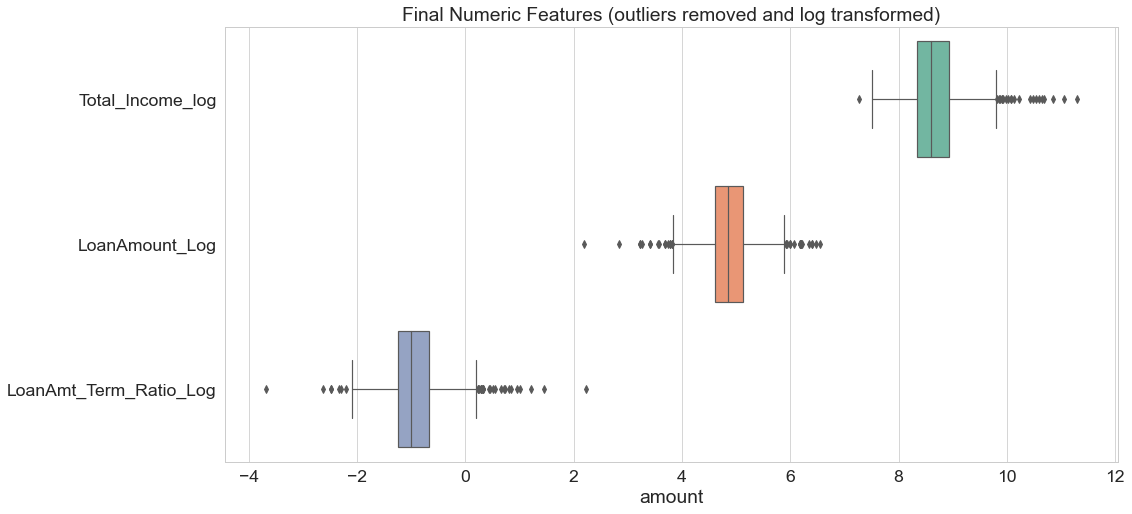

In [68]:
df['LoanAmount_Log'] = np.log(df.LoanAmount)
df['Total_Income'] = df['ApplicantIncome'] +df['CoapplicantIncome']
df['Total_Income_log'] = np.log(df['Total_Income'])
df['LoanAmt_Term_Ratio_Log']=  np.log(df.LoanAmount/df.Loan_Amount_Term)

df_plot = df[[ 'Total_Income_log', 'LoanAmount_Log', 'LoanAmt_Term_Ratio_Log']]

sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2)  
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_plot, orient="h", palette="Set2")

# ax = sns.boxplot(data=box_data)
# sns.set_palette(palette="crest", n_colors=1)
sns.color_palette("crest", as_cmap=True)

ax.set(title='Final Numeric Features (outliers removed and log transformed)', xlabel="amount");

Look at the distribution of income segregated  by `Education`

In [66]:
df_edu = df[['Education', 'ApplicantIncome']]
df_edu.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

Mean 5053.828358208955
Median 4759.0


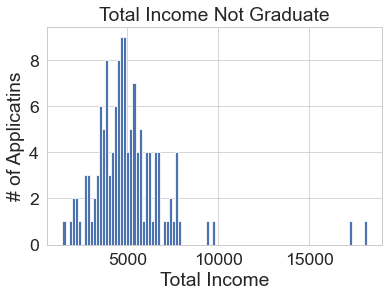

In [69]:
df_grad = df[df.Education == 'Graduate']
df_not_grad = df[df.Education == 'Not Graduate']

x =  df_not_grad.Total_Income
plt.hist(x, bins=100) 
plt.title('Total Income Not Graduate')
plt.ylabel('# of Applicatins')
plt.xlabel('Total Income');

print(f'Mean {df_not_grad.Total_Income.mean()}')
print(f'Median {df_not_grad.Total_Income.median()}')

Mean 7574.908166643
Median 5733.0


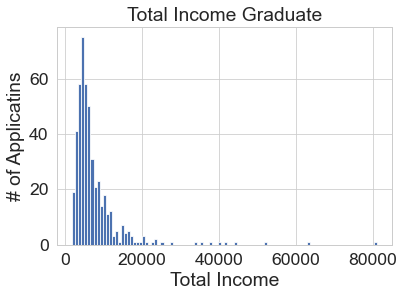

In [70]:
x =  df_grad.Total_Income
plt.hist(x, bins=100) 
plt.title('Total Income Graduate')
plt.ylabel('# of Applicatins')
plt.xlabel('Total Income');
print(f'Mean {df_grad.Total_Income.mean()}')
print(f'Median {df_grad.Total_Income.median()}')

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [ ]:
# Come back and look at pivot tables **

### my notes

In [ ]:
# See next notebook for cleaning, modelling and pickling - keeping this for future reference

In [ ]:
# preprocess_pipeline = make_pipeline(   
#     FeatureUnion(transformer_list=[
#         ('Handle numeric columns', make_pipeline(
#             ColumnSelector(columns=['Amount']),
#             SimpleImputer(strategy='constant', fill_value=0),
#             StandardScaler()
#         )),
#         ('Handle categorical data', make_pipeline(
#             ColumnSelector(columns=['Type', 'Name', 'Changes']),
#             SimpleImputer(strategy='constant', missing_values=' ', fill_value='missing_value'),
#             OneHotEncoder(sparse=False)
#         ))
#     ])
# )

In [ ]:
# num_pipeline = Pipeline([
#     (“num_feats”, keep_num),
#     (“impute_num”, null_replace_num),
#     (“kBest”, k_best)
# ])
# cat_pipeline = Pipeline([
#     (“cat_feats”, keep_cat),
#     (“impute_cat”, null_replace_cat),
#     (“dummies”, ohe),
#     (“to_dense”, to_dense),
#     (“pca”, pca)
# ])
# all_features = FeatureUnion([
#     (‘numeric_features’, num_pipeline),
#     (‘categorical_features’, cat_pipeline),
# ])
# main_pipeline = Pipeline([
#     (‘all_features’, all_features),
#     (‘modeling’, base_model)
# ])
